**Intensity tranformation implementation**

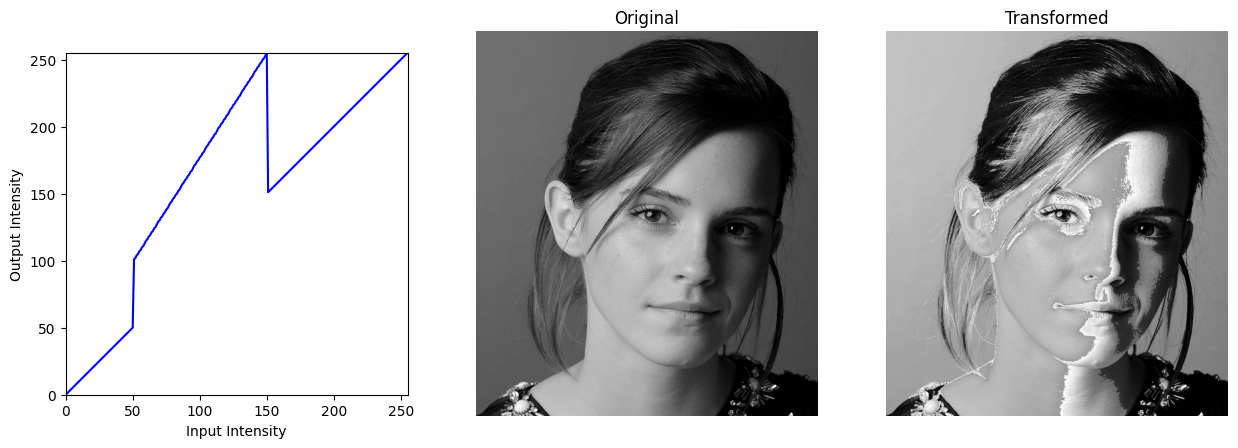

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(50,50),(50,100),(150,255) ,(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1] + 1, c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1] + 1, 255, 255-c[3,0]).astype('uint8')

transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

im1 = cv.imread('D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\emma.jpg', cv.IMREAD_GRAYSCALE)
assert im1 is not None

fig, ax = plt.subplots(1, 3, figsize=(15,5) )
ax[0].plot(transform, 'b', label='Transformation')
ax[0].set_xlabel(r'Input Intensity')
ax[0].set_ylabel('Output Intensity')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[1].imshow(im1, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(transform[im1], cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()

**Brain photon density image intensity transformation**

*    To accentuate white or gray areas in a dark regions of an image negative intensity transformation is used.

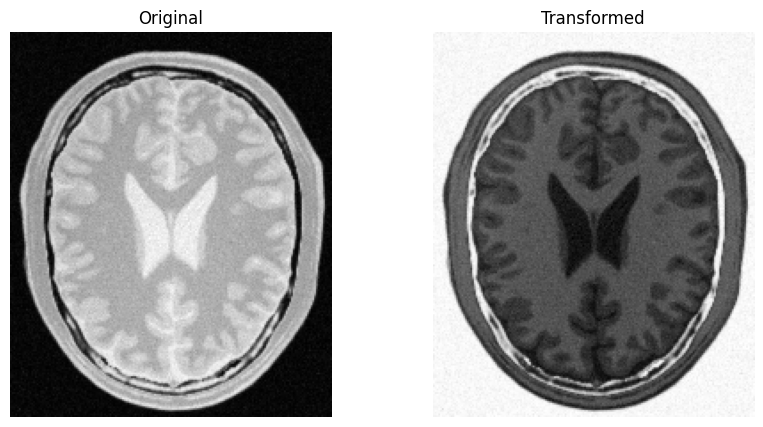

In [45]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im2 = cv.imread('D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert im2 is not None
t = np.arange(255, -1, -1, dtype=np.uint8)
g = cv.LUT(im2, t)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(im2, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(t[im2], cmap='gray')
ax[1].set_title('Transformed')
ax[1].axis('off')
plt.show()

**Applying Gamma correction**

*    L plane refers to the lightness plane of the image (black to white).
*    When we are applying gamma correction to the L plane of the image it will only affect to the brightness of the image (without changing the colour)


*    In the given image we can observe that the details in the dark areas can not be clearly seen, so we need to enhance this dark areas in the input image.
*    Here, we need to map the low intensity valyes into a higher range to enhance the details in dark areas, so we will use a gamma value which is less than 1.

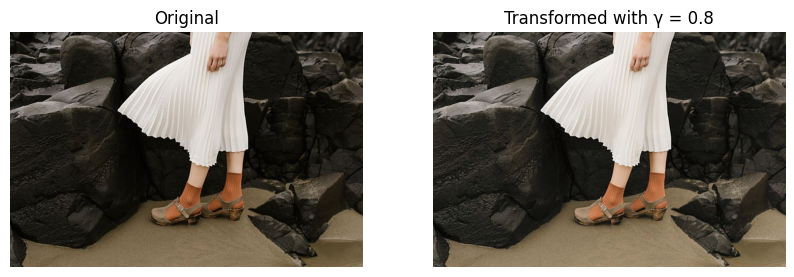

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


im3 = cv2.imread('D:/semester 5/Intensity transformation and neighbourhood filtering/a1images/a1images/highlights_and_shadows.jpg')
assert im3 is not None

# Convert the image from BGR to L*a*b* color space
lab_image = cv2.cvtColor(im3, cv2.COLOR_BGR2LAB)

# Split the L, a, and b channels
L, a, b = cv2.split(lab_image)

# Define gamma 
gamma = 0.8
t = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)], dtype=np.uint8)
corrected_L = cv2.LUT(L, t)

# Merge the corrected L plane back with a and b channels
corrected_lab_image = cv2.merge((corrected_L, a, b))

# Convert the corrected image back to BGR color space
corrected_image = cv2.cvtColor(corrected_lab_image, cv2.COLOR_LAB2BGR)

# Display the original and gamma corrected images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(cv2.cvtColor(im3, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')

# Gamma corrected image
ax[1].imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
ax[1].set_title(f'Transformed with γ = {gamma}')
ax[1].axis('off')

plt.show()


**Histograms of the above images**

In [47]:
#####Histogram comparison#########


# import cv2 as cv
# import numpy as np
# import matplotlib.pyplot as plt

# # Assuming im3 is the original image and corrected_image is the gamma corrected image
# color = ('b', 'g', 'r')
# plt.figure(figsize=(10, 5))  # Create a larger figure for better visualization

# for i, c in enumerate(color):
#     # Calculate histogram for the original image
#     hist1 = cv.calcHist([im3], [i], None, [256], [0, 256])
#     # Calculate histogram for the gamma corrected image
#     hist2 = cv.calcHist([corrected_image], [i], None, [256], [0, 256])

#     # Plot the original image histogram
#     plt.plot(hist1, color=c, linestyle='-', label=f'Original {c.upper()}')
#     # Plot the gamma corrected image histogram
#     plt.plot(hist2, color=c, linestyle='--', label=f'Corrected {c.upper()}')

# # Add labels and legends for clarity
# plt.xlim([0, 256])
# plt.title("Histogram Comparison (Original vs Gamma Corrected)")
# plt.xlabel("Pixel Intensity")
# plt.ylabel("Frequency")
# plt.legend(loc="upper right")

# # Display the plot
# plt.show()


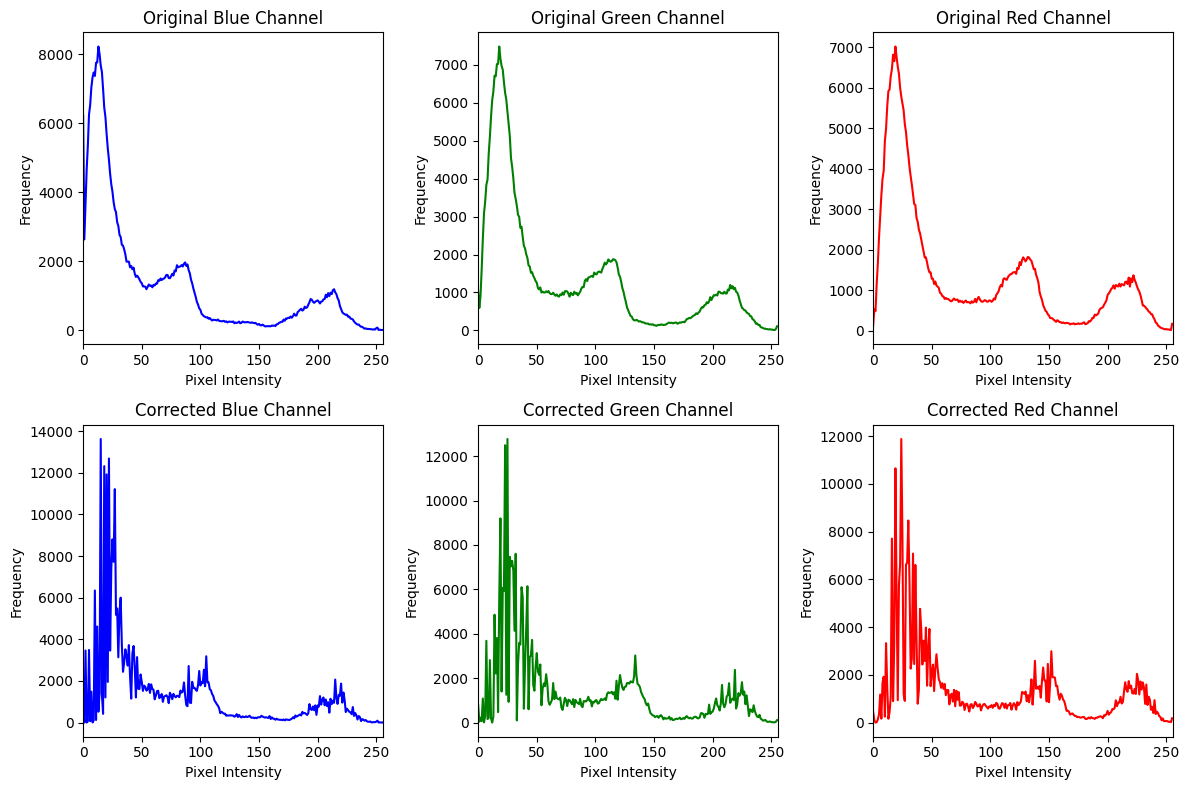

In [48]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Assuming im3 is the original image and corrected_image is the gamma-corrected image
color = ('b', 'g', 'r')
color_name = {'b': 'Blue', 'g': 'Green', 'r': 'Red'}

plt.figure(figsize=(12, 8))  # Create a larger figure for better visualization

# Loop through each color channel (B, G, R)
for i, c in enumerate(color):
    # Calculate histogram for the original image
    hist1 = cv.calcHist([im3], [i], None, [256], [0, 256])
    # Calculate histogram for the gamma-corrected image
    hist2 = cv.calcHist([corrected_image], [i], None, [256], [0, 256])

    # Create a subplot for the original image histogram
    plt.subplot(2, 3, i + 1)
    plt.plot(hist1, color=c)
    plt.title(f'Original {color_name[c]} Channel')
    plt.xlim([0, 256])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    # Create a subplot for the gamma-corrected image histogram
    plt.subplot(2, 3, i + 4)
    plt.plot(hist2, color=c)
    plt.title(f'Corrected {color_name[c]} Channel')
    plt.xlim([0, 256])
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


*    By observing these histograms we can clearly see that the corrected image has higher low intensity pixels compared to the original image. That implies that the low intensity values of the original image has mapped into a higher range of pixel in the gamma corrected image.

*    Also the gamma corrected histograms have slightly skewed to the left.

**Increasing the vibrance of a photograph**

Seperating into hue , saturation and value planes.

*    Hue:This represents the color type and is the angle in the color wheel.
*    Saturation:This measures the intensity or purity of the color.
*    Value (sometimes called Brightness):This represents the brightness or lightness of the color.

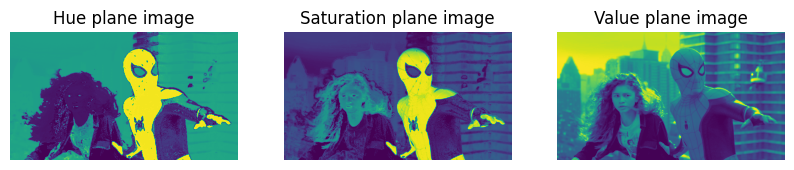

In [49]:
import cv2 as cv

# Read the image
image = cv.imread('D:\semester 5\Intensity transformation and neighbourhood filtering\\a1images\\a1images\spider.png')
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into individual channels
hue_plane, saturation_plane, value_plane = cv2.split(hsv_image)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))

#Hue plane image
ax[0].imshow(hue_plane)
ax[0].set_title('Hue plane image')
ax[0].axis('off')

#Saturation plane image
ax[1].imshow(saturation_plane)
ax[1].set_title('Saturation plane image')
ax[1].axis('off')

#Value plane image
ax[2].imshow(value_plane)
ax[2].set_title('Value plane image')
ax[2].axis('off')
plt.show()

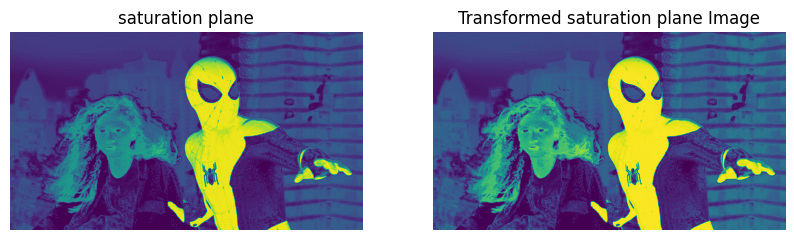

In [53]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

a = 0.7
sigma = 70

f_x = np.array([min(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)),255) for x in range(256)], dtype=np.uint8)
transformedImage = cv.LUT(saturation_plane,f_x)

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(saturation_plane)
ax[0].set_title('saturation plane')
ax[0].axis('off')
ax[1].imshow(transformedImage)
ax[1].set_title('Transformed saturation plane Image')
ax[1].axis('off')

plt.show()

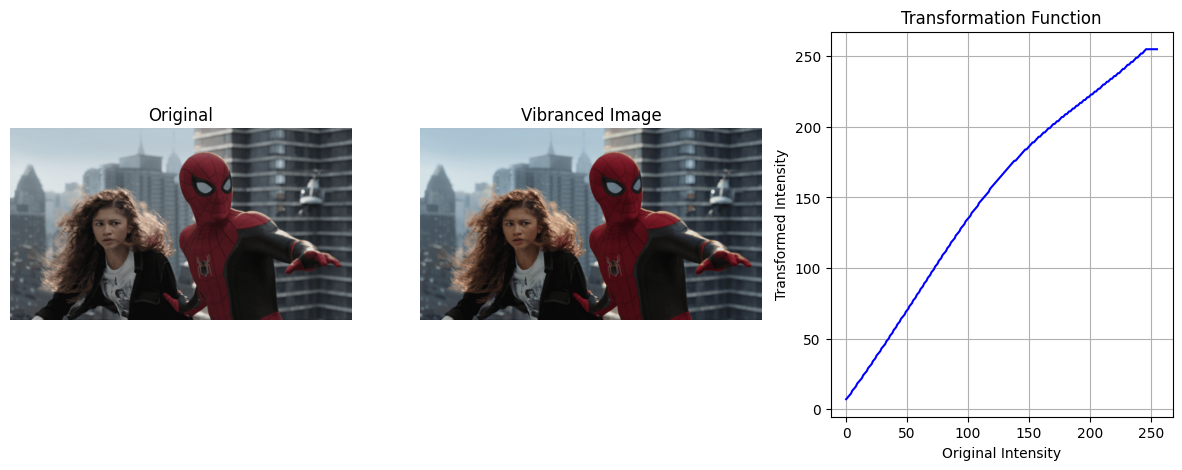

In [65]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv.imread(r'D:\semester 5\Intensity transformation and neighbourhood filtering\a1images\a1images\spider.png')

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into individual channels
hue_plane, saturation_plane, value_plane = cv.split(hsv_image)

# Define the intensity transformation function
a = 0.3
sigma = 70
x_values = np.arange(256)

f_x = np.array([min(x + a * 128 * np.exp(-((x - 128)**2) / (2 * sigma**2)), 255) for x in range(256)], dtype=np.uint8)

# Apply the transformation to the saturation plane
transformedImage = cv.LUT(saturation_plane, f_x)

# Merge the transformed saturation plane back with the original hue and value planes
vibrancedImage = cv.merge((hue_plane, transformedImage, value_plane))

# Convert the HSV image back to BGR for visualization
vibrancedImage_BGR = cv.cvtColor(vibrancedImage, cv.COLOR_HSV2BGR)

# Plot the images and transformation
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original image
ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')

# Vibranced image
ax[1].imshow(cv.cvtColor(vibrancedImage_BGR, cv.COLOR_BGR2RGB))
ax[1].set_title('Vibranced Image')
ax[1].axis('off')

# Transformation function plot
ax[2].plot(x_values, f_x, linestyle='-', color='b')
ax[2].set_title('Transformation Function')
ax[2].set_xlabel('Original Intensity')
ax[2].set_ylabel('Transformed Intensity')
ax[2].grid(True)
ax[2].axis('on')
plt.show()


**Histogram Equalization**